In [56]:
import numpy
import pandas

In [89]:
prices = [pandas.read_excel('texas_energy_prices2.xlsx', sheet_name=i) for i in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [90]:
prices_df = pandas.concat(prices, axis=0)

In [91]:
prices_df

,Delivery Date,Hour Ending,Repeated Hour Flag,Settlement Point,Settlement Point Price
0,01/01/2020,01:00,N,HB_BUSAVG,11.27
1,01/01/2020,01:00,N,HB_HOUSTON,11.27
2,01/01/2020,01:00,N,HB_HUBAVG,11.23
3,01/01/2020,01:00,N,HB_NORTH,11.29
4,01/01/2020,01:00,N,HB_PAN,0.00
...,...,...,...,...,...
11155,12/31/2020,24:00,N,LZ_LCRA,23.64
11156,12/31/2020,24:00,N,LZ_NORTH,22.80
11157,12/31/2020,24:00,N,LZ_RAYBN,22.81
11158,12/31/2020,24:00,N,LZ_SOUTH,23.27


In [112]:
prices_ho = prices_df[prices_df['Settlement Point'] == 'HB_HUBAVG']

In [113]:
prices_ho = prices_ho.reset_index(drop= True)

In [114]:
len(prices_ho)

8784

In [115]:
hours = [f'0{i}:00' for i in range(10)] + [f'{i}:00' for i in range(10,24)]

In [116]:
prices_ho['Hour Ending'] = hours*366

In [117]:
prices_ho['Time'] = prices_ho['Delivery Date'] + ' ' +  prices_ho['Hour Ending']

In [118]:
prices_ho['Time'] = pandas.to_datetime(prices_ho['Time'])

In [119]:
prices_ho.index = prices_ho['Time']

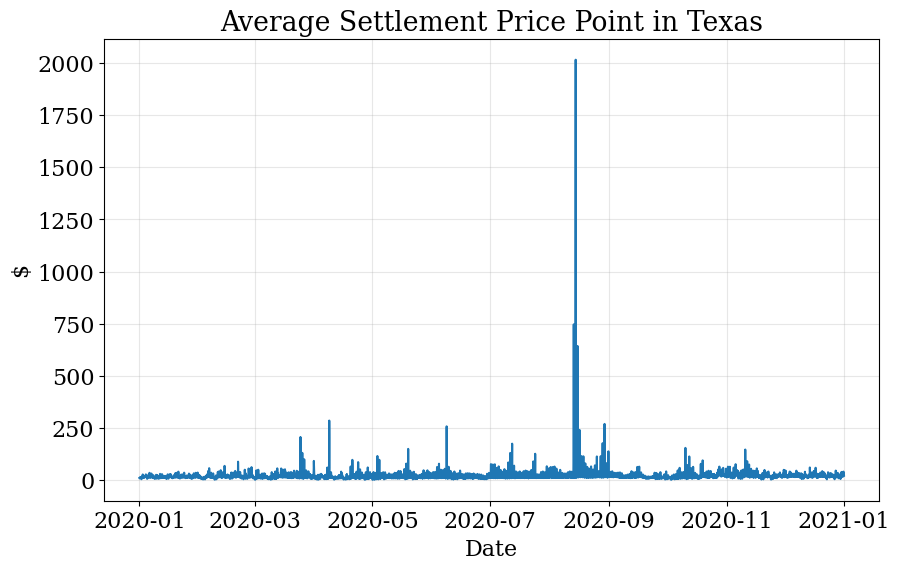

In [121]:
from matplotlib import rc 

rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize= (10,6))
plt.plot(prices_ho['Settlement Point Price'])
plt.ylabel("$")
plt.xlabel("Date")
plt.title(
    f"Average Settlement Price Point in Texas")
# plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.rcdefaults()


In [17]:
prices_df['Time'] = pandas.to_datetime(prices_df['Time'], format='%m/%d/%Y %H:%M', errors='coerce')

# Replace "24:00" with "00:00" of the following day
prices_df['Time'] = prices_df['Time'].apply(lambda x: x + pandas.DateOffset(days=1) if x.hour == 0 and x.minute == 0 else x)